# implemention of Kmeans clustering from scratch

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt

# 1-intialize Centroids Randomly

it would be better if the centroids are points from our data itself

In [14]:
def intialize_centroids(X,K):
    ##input........1-X data (m,n)
                # 2-K no of clusters 
    ##output........centroids(k,n)
    
    np.random.shuffle(X)
    centroids=X[: K ,:]
    return centroids

# 2-label each datapoint to it's cluster

Based on the distance between each data point and each cluster this point will be assigned to the cluster with the nearset
centroid.

In [15]:
def assign_labels(X,centroids):
    #input    X.........(m,n)
            # cnetroids...(k,n)
   #output........labels(m,1)
        dist=[]
        idxs=[]
        for point in X:
            for c in centroids:
                dist.append(np.sum((point-c)**2))
            idx=np.argmin(dist)
            idxs.append(idx)
            dist=[]
        idxs=np.array(idxs)
        return idxs

        

# Update Centroids

Based on each cluster calculation we update the centroids position for each cluster

In [16]:
def update_centroid(K,idx,X):
    #input ......K.....no of clusters
    #............idx....(m,1)
    #............X......(m,n)
    
    #output..........centroids...(k,n)
    centroids=[]
    clusters=[]
    for c in range(K):
        z=X[idx==c]
        clusters.append(np.array(z))
        centroids.append(np.mean(z,axis=0))
    
    return np.array(centroids),clusters
        

In [17]:
def cal_cost(centroids,clusters):
    cost=0
    for c,center in zip(centroids,clusters):
        cost+=np.sum((c-center)**2)
    return cost
        

# Main Function

In [18]:
def k_means(X,K,iterations):
    centroids=intialize_centroids(X,K)
    for i in range(iterations):
        labels=assign_labels(X,centroids)
        centroids,clusters=update_centroid(K,labels,X)
        cost=cal_cost(centroids,clusters)
    return centroids,labels,cost
    
    
    

# Test_on_data

In [19]:
data=pd.read_csv('clustering.csv')

In [20]:
data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [21]:
data=data[['ApplicantIncome','LoanAmount']]

In [22]:
X=data.values

<AxesSubplot:>

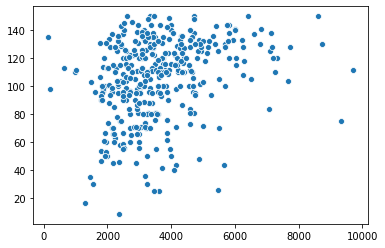

In [23]:
sns.scatterplot(X[:,0],X[:,1])

In [24]:
centroids,labels,cost=k_means(X,3,50)

<AxesSubplot:>

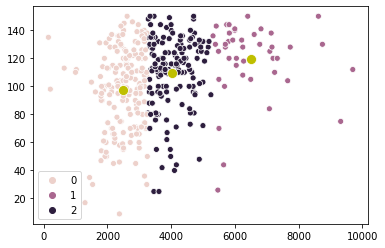

In [25]:
sns.scatterplot(X[:,0],X[:,1],hue=labels)
sns.scatterplot(centroids[:,0],centroids[:,1],s=100,color='y')

# Choosing optimal K

In [26]:
def elbow_method(X):
    costs=[]
    diff=[]
    K=np.arange(1,10)
    for val in K:
        _,_ ,cost=k_means(X,val,50)
        costs.append(cost)
    sns.set()
    plt.plot(K,costs)
    plt.title('elbow method')
    plt.xlabel('K')
    plt.ylabel('intertia')
    
    

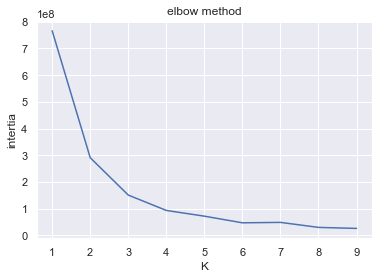

In [27]:
elbow_method(X)